<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 - Mentoría </h3>


###### Integrante: 
* Tarletta Juan

In [1]:
#Importamos las librerías necesarias para trabajar en el práctico
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn
import scipy.stats as stats
import statsmodels.api as sm
import random
from IPython.display import display, Markdown

In [2]:
#Equipo: Indica si corresponde al mismo camion
#Componente: Indica a que componente pertenece la muestra
#Horas Funcionamiento: Indica la cantidad de horas de funcionamiento del camión (sería como el kilometraje de los camiones)
#Horas del Aceite: Representa la cantidad de horas de utilización del aceite (este dato es importante dado que a medida que, a mayor horas de uso del aceite, el mismo comienza a desgastarse)
#Resultado: (El laboratorio indica si la muestra de aceite está Bien = 1, Regular=2, Mal=3)
#St: Presencia de Hollin en el Aceite
#Al: Presencia de Aluminio en el Aceite
#Fe Presencia de Hierro en el Aceite
#Si Presencia de Silicio en el Aceite
#Na Presencia de Sodio en el Aceite
#Visco: Viscosidad del aceite

## 1. Análisis General de las variables

 #### 1. Realizar un análisis de las variables que presenta el dataset (al margen de analizar los features mas importantes que comentamos al inicio del notebook, revisar el resto de los features)

In [3]:
dataset = pd.read_csv('OilDataSet.csv')
important_cols= ['Equipo', 'Componente','Resultado','Horas Funcionamiento','Horas del Aceite', 'VISCO', 'St', 'Al', 'Fe', 'Si', 'Na' ]

dataset[important_cols]

#De la función "describe" localizamos los valores mínimos y máximos(filas), para todas las variables numéricas(columnas)
min_max = dataset[important_cols].describe().loc[['min','max'],:]

mini = min_max.loc['min']
maxi = min_max.loc['max']

#Obtenemos el rango
rango = maxi - mini


#Convertimos la "Serie" del rango en "DataFrame", y agregamos la columna Rango
rango = rango.to_frame(name='Rango')

#Aplicamos la función lambda para establecer los valores con dos decimales de coma flotante.
rango = rango.applymap(lambda x: float("%.2f" %x))
rango


,Rango
Equipo,706.0
Resultado,2.0
Horas Funcionamiento,79884.0
Horas del Aceite,20208.0
VISCO,341.7
St,131.0
Al,37.1
Fe,709.0
Si,1721.0
Na,35352.0


In [4]:
#Vemos una descripción general del dataset
describe_dataset = dataset.describe().applymap(lambda x: float("%.2f" %x))
describe_dataset

,Equipo,Id,Resultado,Horas Funcionamiento,Horas del Aceite,B,Nit,Oxi,Sul,St,...,P,Zn,Ag,Ti,VISCO,TBN,TAN,ISO14,ISO4,ISO6
count,18469.00,18469.00,18469.00,18469.00,17707.00,17802.00,3099.00,3430.00,3099.00,2931.00,...,17816.00,17817.0,17816.00,17816.00,17611.00,1452.00,327.00,12295.00,12295.00,12295.00
mean,1446.55,235618.10,1.41,37053.59,1000.69,60.80,5.82,13.67,18.24,21.85,...,637.23,624.8,0.02,0.04,17.29,9.57,1.62,13.60,20.93,17.76
std,156.74,31734.06,0.66,10765.69,1270.91,50.55,1.85,4.15,4.46,20.67,...,318.61,568.3,0.12,0.17,8.44,0.79,0.81,1.44,1.37,1.63
min,1355.00,155972.00,1.00,106.00,0.00,0.00,0.00,0.80,3.00,0.00,...,0.10,0.0,0.00,0.00,0.00,6.60,0.50,10.00,15.00,13.00
25%,1381.00,207515.00,1.00,32502.00,308.00,4.00,4.00,9.00,13.00,0.00,...,326.00,23.0,0.00,0.00,11.00,9.30,1.40,13.00,20.00,17.00
50%,1398.00,238977.00,1.00,40116.00,585.00,85.90,6.00,15.00,20.00,24.00,...,762.00,1013.0,0.00,0.00,14.90,9.70,1.60,13.00,21.00,18.00
75%,1424.00,263301.00,2.00,44704.00,1226.00,102.00,7.00,17.00,22.00,35.00,...,916.00,1150.0,0.00,0.00,24.20,10.00,1.80,14.00,22.00,19.00
max,2061.00,285436.00,3.00,79990.00,20208.00,492.00,17.00,23.00,27.00,131.00,...,2479.00,2880.0,8.00,6.80,341.70,11.80,14.10,20.00,24.00,23.00


#### 2. Obtendremos la media, mediana y desviación estándar de algunos Features. Agrupando esta información por Componente

In [5]:

#Creamos una función que nos da la lista de componentes (Sin repetir)
def componentes_ciclo():
    componentes=[]
    np.array(componentes)
    for x in dataset['Componente']: 
        if x not in componentes: 
            componentes.append(x)
    return componentes
compo = []
sta_compos = []

#Realizamos una iteración que nos devuelva los estadísticos que deseamos sobre cada componente
for componente in componentes_ciclo():
    #Obtenemos las estadísticas del componente que nos interesa
    sta_compo = dataset[dataset['Componente'] == componente].describe()
    #Localizamos las estadísticas y features de nuestro interes (No seleccionamos Viscosidad y Hollin ya que son NaN's)
    sta_compo = sta_compo.loc[["mean",'50%','std'],['Horas Funcionamiento','Horas del Aceite','Fe','Al','Si','Na']]
    #Aplicamos solo dos digitos de coma flotante para una mejor visualización 
    sta_compo = sta_compo.applymap(lambda x: float("%.2f" %x))
    
    
    sta_compos +=[sta_compo]
    compo += [dataset[dataset['Componente'] == componente]]
    
    #imprimimos
    display("Para el componente '{}':".format(componente),sta_compo,)
    


"Para el componente 'Masa Izquierda':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,37001.24,443.21,30.23,0.09,5.02,5.26
50%,40085.00,422.00,16.00,0.00,3.00,4.00
std,10735.39,187.12,37.90,0.30,6.95,6.31


"Para el componente 'Sist. Hidráulico':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,37030.67,1319.71,14.31,2.16,12.68,5.39
50%,40310.00,1108.00,8.00,2.00,11.00,4.00
std,10831.99,1052.49,37.07,1.58,6.01,5.66


"Para el componente 'Convertidor':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,36998.07,636.53,5.51,0.96,3.64,2.51
50%,40199.00,559.00,4.30,1.00,3.00,2.00
std,10851.48,345.06,8.56,1.04,2.52,1.64


"Para el componente 'Diferencial Trasero':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,36896.70,1277.05,22.34,0.10,2.91,5.77
50%,40031.00,1127.00,19.00,0.00,2.00,5.10
std,10777.15,852.98,13.81,0.41,2.24,1.74


"Para el componente 'Mando Final TD':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,36901.28,1314.65,22.79,0.07,2.89,5.79
50%,40007.00,1181.00,19.00,0.00,2.00,5.10
std,10831.75,883.85,13.96,0.25,2.18,1.73


"Para el componente 'Masa Derecha':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,36976.09,445.36,23.96,0.13,4.68,4.59
50%,40048.00,428.00,11.00,0.00,3.00,4.00
std,10750.99,187.72,38.40,1.16,7.56,1.39


"Para el componente 'Motor':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,36878.52,296.9,22.52,1.77,6.23,17.47
50%,39896.00,279.0,18.70,2.00,3.00,5.00
std,10836.95,127.1,15.47,1.36,68.48,103.29


"Para el componente 'Sist de Dirección':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,36935.95,1337.91,1.87,1.00,4.00,3.07
50%,40151.00,1096.00,2.00,1.00,4.00,3.00
std,10876.22,938.27,1.27,0.69,2.25,2.17


"Para el componente 'Mando Final TI':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,36946.68,1304.60,22.89,0.08,2.9,5.79
50%,40037.50,1161.50,19.00,0.00,2.0,5.00
std,10740.83,864.51,13.98,0.35,2.2,2.13


"Para el componente 'Transmisión':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,37091.76,638.57,5.68,0.97,3.67,2.58
50%,40097.00,561.00,4.80,1.00,3.00,2.00
std,10650.21,358.50,8.86,0.87,2.43,1.74


"Para el componente 'Radiador':"

,Horas Funcionamiento,Horas del Aceite,Fe,Al,Si,Na
mean,39824.98,5637.16,12.31,10.72,39.52,14610.33
50%,43387.00,5151.00,4.40,10.40,25.20,13944.00
std,9687.96,4534.46,16.18,2.32,39.19,9434.97


#####  3.¿Cómo pueden sanearse los valores faltantes?

De los vaores faltantes hay que tener en cuenta si su distribución es aleatoria o no, ya que si no lo son, éstos pueden disminuir la representatividad de la muestra.
La forma de sanear los datos faltantes puede ser: 
1. Mediante la eliminación de los mismos ( Preferentemente si los faltantes son aleatorios).
2. Mediante la sustitución de esos datos( En estas sustituciones se pueden determinar los valores a través de Media, Moda, Regresión, Knn, entre otras)

#### A continuación analizaremos la presencia de Outliers para cada componente

In [6]:
#Realizamos un analisis de los Outliers pertenecientes a cada componente, con los Features más representativos

#Creamos un DataFrame en el que almacenaremos los datos relevantes al respecto
out_index = np.array(['Outliers Inferiores','Outliers Superiores','Outliers Totales','Total de Datos','Total de Datos Sin Outliers'])
elementos = np.array(['Fe', 'Si', 'Na','Al'])
dataliers = pd.DataFrame(index=out_index, columns=elementos)


total_analizados=0
#Realizamos una iteración que nos seleccione el componente deseado(Motor,Sist. Hidráulico, etc)
for componente in componentes_ciclo():
    
    #Realizamos otra iteración pero esta vez para obtener los datos de cada elemento(Fe,Si,Na,Al)
    for elemento in elementos:
        
        #Seleccionamos los datos de interes (Componente con el elemento asociado)
        data_compo_elemen = dataset[dataset['Componente'] == componente].loc[:,[elemento]].dropna()
        
        
        #Obtenemos sus estadísticos.
        sta_elemento = data_compo_elemen.describe()
        
        
        
        #Primer Cuartil o percentil 25th Q1=25% de los datos.
        q1 = sta_elemento[4:5][elemento].values #Utilizamos el valor del elemento con la función ".values"
        
      
        #Tercer Cuartil o percentil 75th Q3=75%
        q3 = sta_elemento[6:7][elemento].values
        
       
        #Intercuartil (Q3-Q1)
        iqr = q3-q1
        
      
        #Límites inferior y superior para la busqueda de outliers
        lower_limit = float(q1 -(1.5 * iqr)) #Convertimos el elemento array en float para utilizar el valor numérico luego
        upper_limit = float(q3 +(1.5 * iqr)) #Convertimos el elemento array en float para utilizar el valor numérico luego
        
        
        #Obtenemos la cantidad de outliers inferiores y sus índices
        low_element_cant = data_compo_elemen[data_compo_elemen[elemento] < lower_limit].shape[0] #Nos devuelve el número de filas que cumplen la condición
        low_indice = data_compo_elemen[data_compo_elemen[elemento] < lower_limit].index.tolist()
        
        #Almacenamos el porcentaje en el DataFrame
        i = 0
        dataliers.loc[out_index[i],elemento] = str(round((low_element_cant/data_compo_elemen.shape[0])*100))+'%'
        
        #Obtenemos la cantidad de outliers Superiores y sus índices
        high_element_cant = data_compo_elemen[data_compo_elemen[elemento] > upper_limit].shape[0]
        high_indice = data_compo_elemen[data_compo_elemen[elemento] > upper_limit].index.tolist()

        #Almacenamos el porcentaje en el DataFrame
        i=1 
        dataliers.loc[out_index[i],elemento] = str(round((high_element_cant/data_compo_elemen.shape[0])*100))+'%'
        
        #Almacenamos el porcentaje total outliers
        i = 2
        dataliers.loc[out_index[i],elemento] = str(round(((low_element_cant+high_element_cant)/data_compo_elemen.shape[0])*100))+'%'
        
        #Almacenamos el TOTAL de datos
        i = 3
        dataliers.loc[out_index[i],elemento] = data_compo_elemen.shape[0]

        #Almacenamos el porcentaje TOTAL de datos que quedaría "REMOVIENDO" los outliers
        i = 4
        dataliers.loc[out_index[i],elemento] =str(round(((data_compo_elemen.shape[0]-(low_element_cant+high_element_cant))/data_compo_elemen.shape[0])*100))+'%'
      
        
        
        #Armamos una lista de todos con los índices de Outliers (Inferior y Superior)
        total_out_indice = low_indice + high_indice
        
        #Otra lista con los índices totales
        total_indice = data_compo_elemen.index.tolist()
        
        #Creamos una lista de índices sin outliers
        total_less_outliers_index = set(total_indice) - (set(total_out_indice)) #Utilizamos la función set con la operación "-", para eliminar los índicies repetidos
        total_less_outliers_index = list(total_less_outliers_index) #Transformamos en lista para poderla utilizar como índice
        total_less_outliers_index = sorted(total_less_outliers_index) #La ordenamos
    
    
    #Imprimimos por pantalla el DataFrame correspondiente a cada Componente
    display(componente,dataliers)
    
    


'Masa Izquierda'

,Fe,Si,Na,Al
Outliers Inferiores,0%,0%,1%,0%
Outliers Superiores,7%,9%,8%,19%
Outliers Totales,7%,9%,9%,19%
Total de Datos,1688,1688,1688,1688
Total de Datos Sin Outliers,93%,91%,91%,81%


'Sist. Hidráulico'

,Fe,Si,Na,Al
Outliers Inferiores,0%,0%,0%,0%
Outliers Superiores,7%,5%,3%,2%
Outliers Totales,7%,5%,3%,2%
Total de Datos,1819,1819,1819,1819
Total de Datos Sin Outliers,93%,95%,97%,98%


'Convertidor'

,Fe,Si,Na,Al
Outliers Inferiores,0%,6%,2%,22%
Outliers Superiores,4%,11%,7%,14%
Outliers Totales,4%,17%,9%,36%
Total de Datos,1787,1787,1787,1787
Total de Datos Sin Outliers,96%,83%,91%,64%


'Diferencial Trasero'

,Fe,Si,Na,Al
Outliers Inferiores,0%,0%,1%,0%
Outliers Superiores,5%,3%,6%,17%
Outliers Totales,5%,3%,7%,17%
Total de Datos,1823,1822,1822,1822
Total de Datos Sin Outliers,95%,97%,93%,83%


'Mando Final TD'

,Fe,Si,Na,Al
Outliers Inferiores,0%,0%,0%,0%
Outliers Superiores,5%,4%,6%,16%
Outliers Totales,5%,4%,6%,16%
Total de Datos,1655,1655,1655,1655
Total de Datos Sin Outliers,95%,96%,94%,84%


'Masa Derecha'

,Fe,Si,Na,Al
Outliers Inferiores,0%,0%,1%,0%
Outliers Superiores,9%,7%,6%,18%
Outliers Totales,9%,7%,7%,18%
Total de Datos,1695,1695,1695,1695
Total de Datos Sin Outliers,91%,93%,93%,82%


'Motor'

,Fe,Si,Na,Al
Outliers Inferiores,0%,0%,0%,0%
Outliers Superiores,7%,4%,12%,3%
Outliers Totales,7%,4%,12%,3%
Total de Datos,2119,2118,2118,2118
Total de Datos Sin Outliers,93%,96%,88%,97%


'Sist de Dirección'

,Fe,Si,Na,Al
Outliers Inferiores,0%,0%,0%,22%
Outliers Superiores,5%,4%,3%,20%
Outliers Totales,5%,4%,3%,43%
Total de Datos,1726,1726,1726,1726
Total de Datos Sin Outliers,95%,96%,97%,57%


'Mando Final TI'

,Fe,Si,Na,Al
Outliers Inferiores,0%,0%,0%,0%
Outliers Superiores,4%,4%,6%,17%
Outliers Totales,4%,4%,7%,17%
Total de Datos,1662,1662,1662,1662
Total de Datos Sin Outliers,96%,96%,93%,83%


'Transmisión'

,Fe,Si,Na,Al
Outliers Inferiores,0%,7%,2%,22%
Outliers Superiores,7%,12%,8%,15%
Outliers Totales,7%,19%,10%,37%
Total de Datos,1831,1831,1831,1831
Total de Datos Sin Outliers,93%,81%,90%,63%


'Radiador'

,Fe,Si,Na,Al
Outliers Inferiores,0%,0%,0%,0%
Outliers Superiores,7%,13%,7%,13%
Outliers Totales,7%,13%,7%,13%
Total de Datos,15,15,15,15
Total de Datos Sin Outliers,93%,87%,93%,87%


#### A continuación visualizaremos cada componente con los features más importantes, y veremos como están distribuidos los outliers

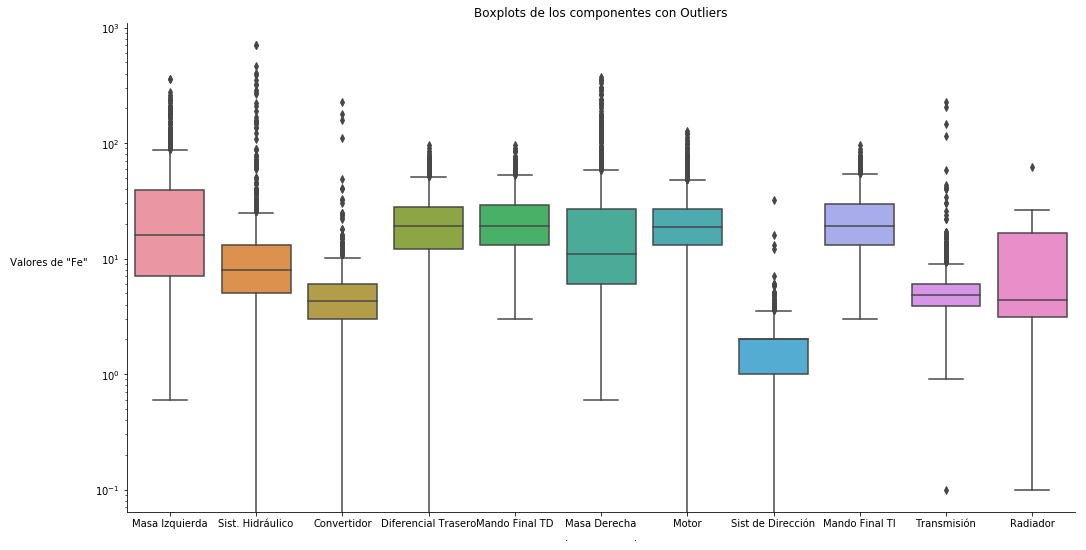

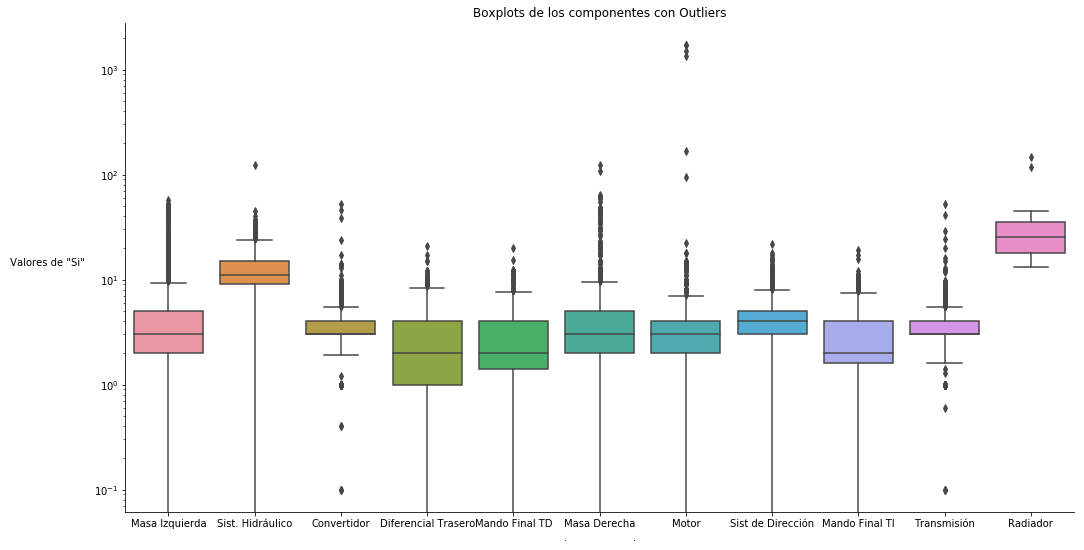

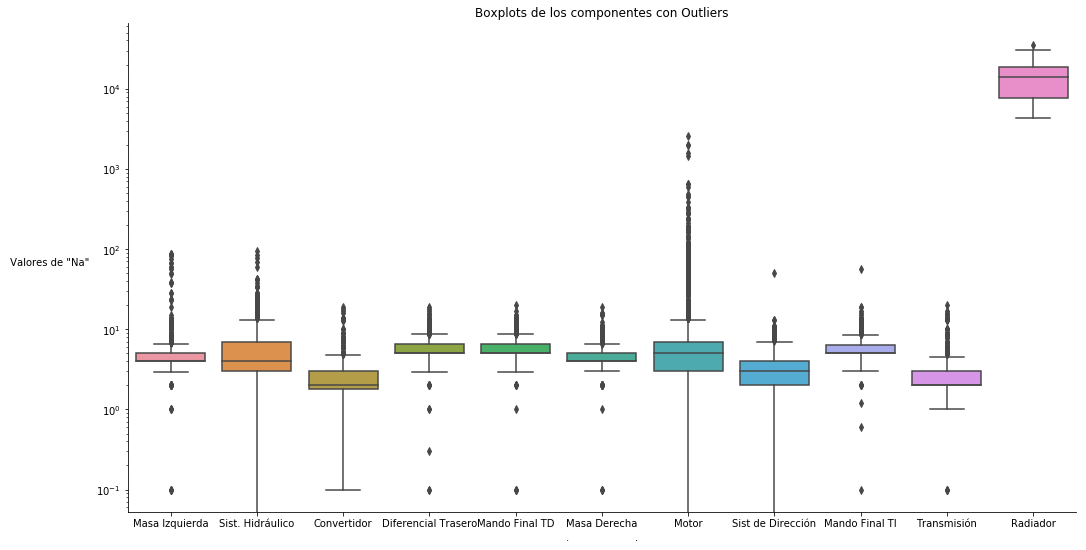

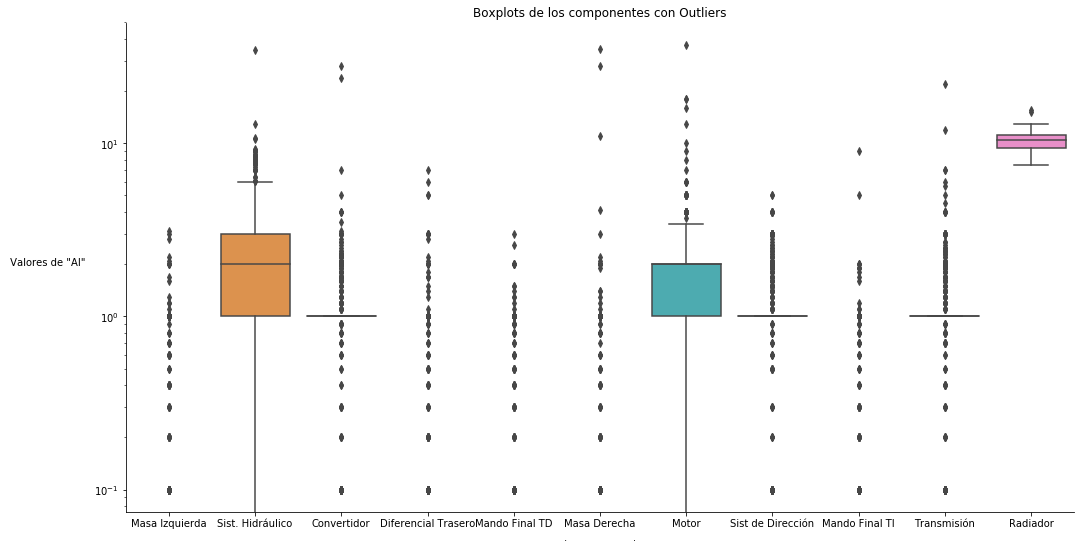

In [7]:
def graficar_boxplot():
    
    for elemento in elementos:
        plt.figure(figsize=(17,9))
        score_box_grap =seaborn.boxplot(x=dataset['Componente'], y=dataset[elemento], orient='v')
        score_box_grap.set_title("Boxplots de los componentes con Outliers") 
        score_box_grap.set_ylabel(' Valores de "{}"                            '.format(elemento), rotation=360)
        score_box_grap.set_xlabel('.        '+'             .')
        score_box_grap.set_yscale('log') #Utilizamos una escala logaritmica para visualizar mijor los gráficos
        seaborn.despine()
        plt.show()
       
graficar_boxplot()

#### A contrinuación realizaremos los mismos gráficos, descartando algunos outliers analíticamente mediante el 'Test de Tukey'

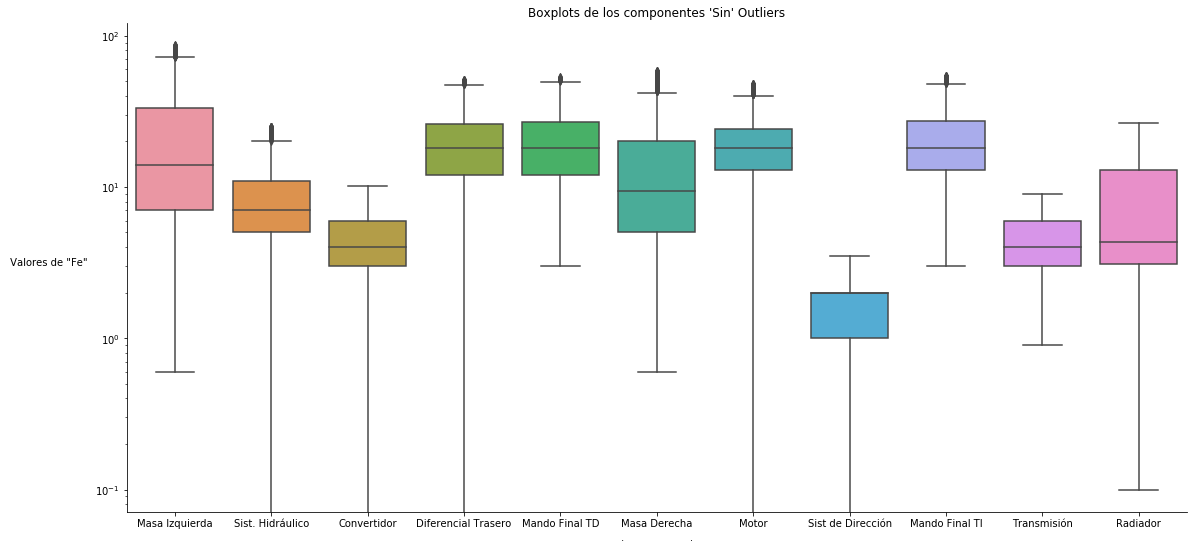

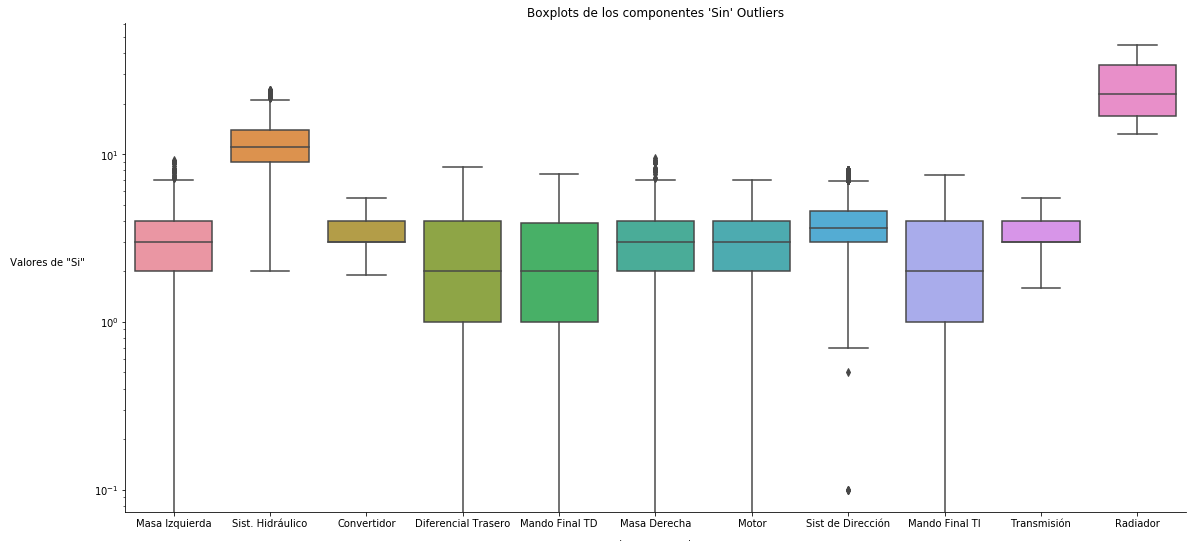

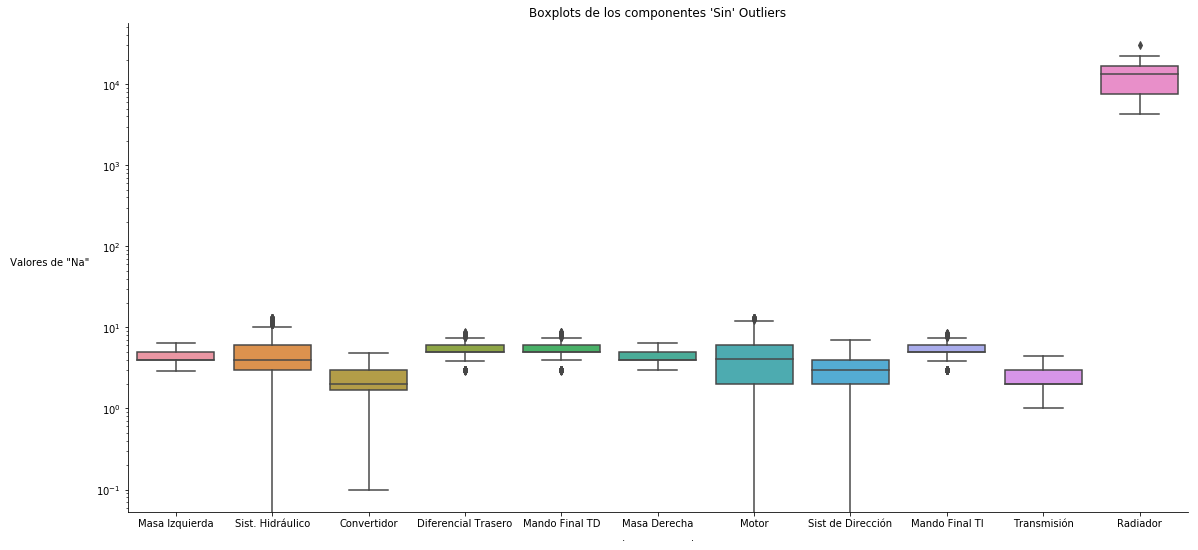

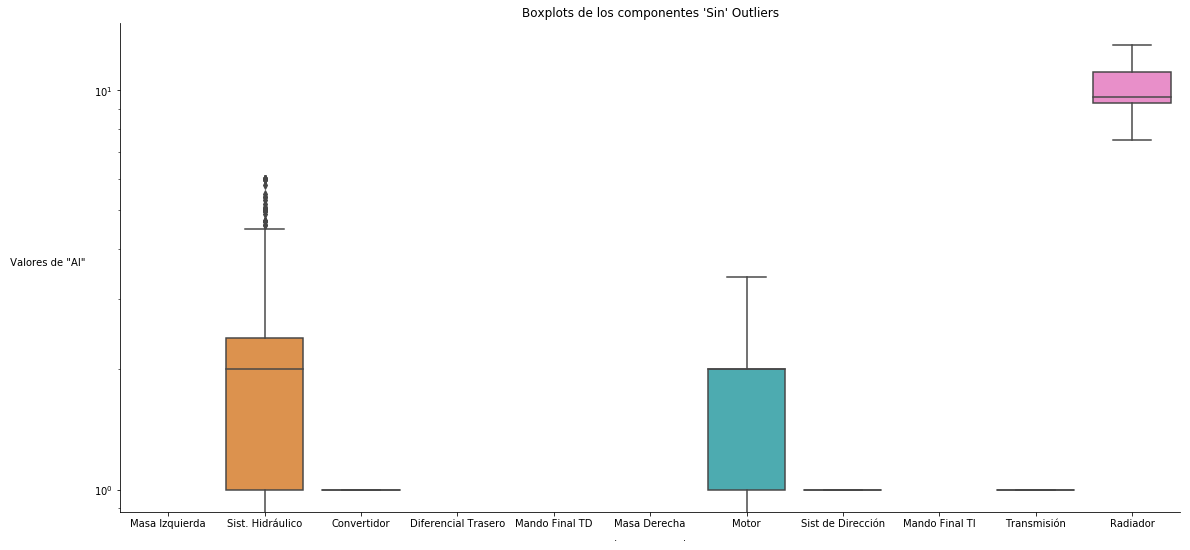

In [8]:
#Realizamos un analisis de los Outliers pertenecientes a cada componente, con los Features más representativos

#Creamos un DataFrame en el que almacenaremos los datos relevantes al respecto
out_index = np.array(['Outliers Inferiores','Outliers Superiores','Outliers Totales','Total de Datos','Total de Datos Sin Outliers'])
elementos = np.array(['Fe', 'Si', 'Na','Al'])
dataliers = pd.DataFrame(index=out_index, columns=elementos)

dataset_clean = dataset

tota=[]
total_analizados=0
#Realizamos una iteración que nos seleccione el componente deseado(Motor,Sist. Hidráulico, etc)
for elemento in elementos:
    tota=[]
    #Realizamos otra iteración pero esta vez para obtener los datos de cada elemento(Fe,Si,Na,Al)
    for componente in componentes_ciclo():
 
        
        #Seleccionamos los datos de interes (Componente con el elemento asociado)
        data_compo_elemen = dataset[dataset['Componente'] == componente].loc[:,[elemento]].dropna()
        
        
        #Obtenemos sus estadísticos.
        sta_elemento = data_compo_elemen.describe()
        
        
        
        #Primer Cuartil o percentil 25th Q1=25% de los datos.
        q1 = sta_elemento[4:5][elemento].values #Utilizamos el valor del elemento con la función ".values"
        
      
        #Tercer Cuartil o percentil 75th Q3=75%
        q3 = sta_elemento[6:7][elemento].values
        
       
        #Intercuartil (Q3-Q1)
        iqr = q3-q1
        
      
        #Límites inferior y superior para la busqueda de outliers
        lower_limit = float(q1 -(1.5 * iqr)) #Convertimos el elemento array en float para utilizar el valor numérico luego
        upper_limit = float(q3 +(1.5 * iqr)) #Convertimos el elemento array en float para utilizar el valor numérico luego
        
        
        #Obtenemos la cantidad de outliers inferiores y sus índices
        low_element_cant = data_compo_elemen[data_compo_elemen[elemento] < lower_limit].shape[0] #Nos devuelve el número de filas que cumplen la condición
        low_indice = data_compo_elemen[data_compo_elemen[elemento] < lower_limit].index.tolist()
        
        
        
        #Obtenemos la cantidad de outliers Superiores y sus índices
        high_element_cant = data_compo_elemen[data_compo_elemen[elemento] > upper_limit].shape[0]
        high_indice = data_compo_elemen[data_compo_elemen[elemento] > upper_limit].index.tolist()

      
        
        #Armamos una lista de todos con los índices de Outliers (Inferior y Superior)
        total_out_indice = low_indice + high_indice
        
        
        #Otra lista con los índices totales
        total_indice = data_compo_elemen.index.tolist()
        
       
        
        #Creamos una lista de índices sin outliers
        total_less_outliers_index = set(total_indice) - (set(total_out_indice)) #Utilizamos la función set con la operación "-", para eliminar los índicies repetidos
        total_less_outliers_index = list(total_less_outliers_index) #Transformamos en lista para poderla utilizar como índice
        tota += total_less_outliers_index
        
        #print(componente, len(tota))
        #total_less_outliers_index = sorted(total_less_outliers_index) #La ordenamos
        
        #Datos sin Outliers
        #total_less_outliers_data = dataset_clean.reindex(total_less_outliers_index)
        
    plt.figure(figsize=(19,9))
    score_box_grap1 = seaborn.boxplot(x=dataset['Componente'], y=dataset.iloc[tota][elemento], orient='v')
    score_box_grap1.set_title("Boxplots de los componentes 'Sin' Outliers") 
    score_box_grap1.set_ylabel(' Valores de "{}"                            '.format(elemento), rotation=360)
    score_box_grap1.set_xlabel('.        '+'             .')
    score_box_grap1.set_yscale('log')#Utilizamos una escala logaritmica para visualizar mijor los gráficos

    seaborn.despine()
    plt.show()  
    


## 2. Graficar 

#### 1. Realizaremos el gráfico de motor de  3 equipos al azar y veremos como evolucionan algunos features a lo largo del tiempo

In [9]:
# Fijamos una semilla para obtener siempre el mismo resultado
random.seed(47)
#Seleccionamos el índice de los 3 Equipos al azar (tenemos que convertir el "diccionario" a "lista" para poder hacerlo).
equipos = random.sample(list(dataset[dataset['Componente']=='Motor']['Equipo'].values), 3)#Recordamos que random.sample es sin reemplazamiento.
equipos

[1402, 1371, 1932]

In [10]:
#Seteamos los datos del equipo (1) a utilizar
data_mot = dataset[(dataset['Componente']=='Motor') & (dataset['Equipo']==1402)]

#Añadimos los features VISCOSIDAD Y Resultado
elementos = np.concatenate((elementos,['VISCO'],['Resultado']))

In [11]:
#Utilizamos una función de agrupación de las "Horas Funcionamiento" para una mejor visualización
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))


#seaborn.countplot(to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,35000,43000), color='c')
#plt.xticks(rotation=45)

intervalo_horas = to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,35000,43000)

In [12]:
#Normalizamos los datos para poder mostrar los features en un mismo gráfico
data_motor = data_mot.copy()
#Creamos una función z-minmax para normalizar los features entre [0,1]
def z(data, maxi, mini):#datos,maximo del feature, minimo del feature
    return (data-mini)/(maxi-mini)


#Obtenemos los datos necesarios de cada feature para realizar la normalización.
for elemento in elementos:
    maxi = data_motor[elemento].dropna().max() #Seleccionamos el máximo del feature
    mini = data_motor[elemento].dropna().min() #Seleccionamos el mínimo del feature
    
    data_motor[elemento] = z(data_motor[elemento],maxi,mini) #Asignamos al dataset los valores normalizados

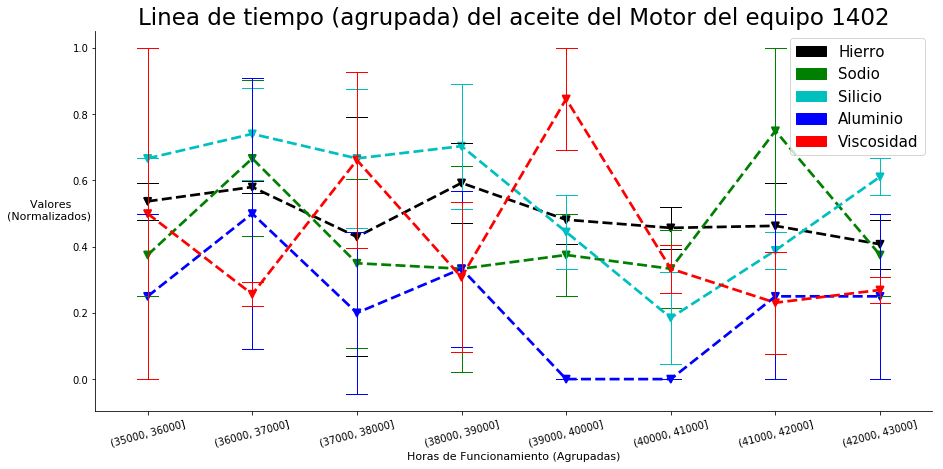

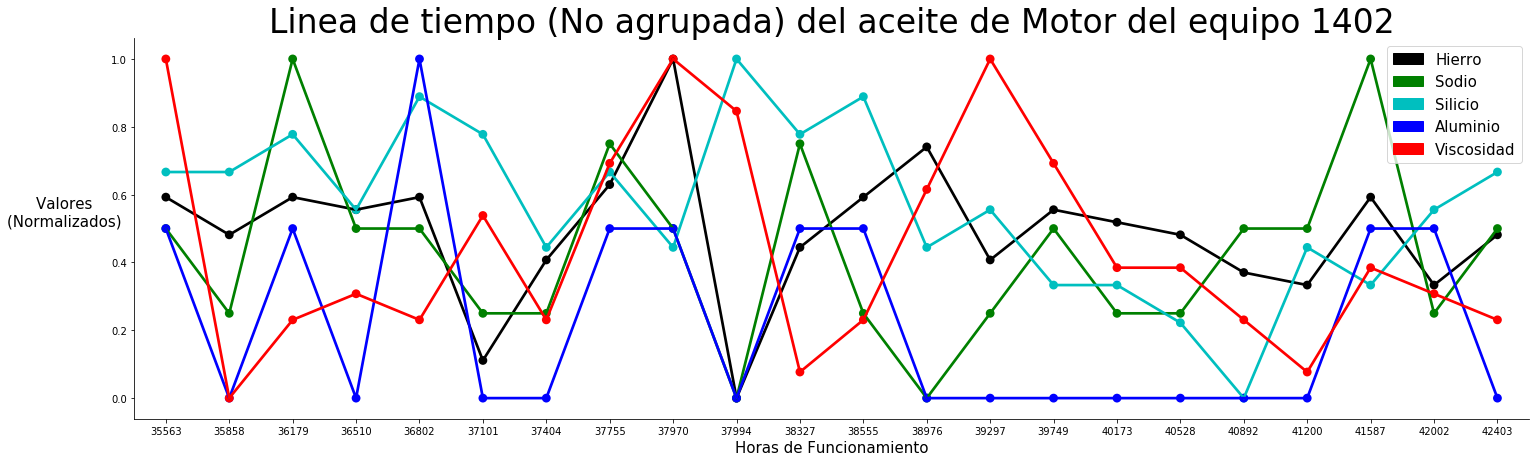

In [13]:
#Realizamos la gráfica del Equipo con los valores normalizados
plt.figure(figsize=(15,7))
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Fe'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Hierro', color='k')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Na'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Sodio', color='g')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Si'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Silicio', color='c')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Al'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Aluminio', color='b')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['VISCO'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Viscosidad', color='r')

plt.xticks(rotation=15)
#Seteamos el label de los componentes
label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

#Ponemos los labels en la imagen, y seteamos el tamaño de las etiquetas
plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
plt.title('Linea de tiempo (agrupada) del aceite del Motor del equipo {}'.format(equipos[0]), size=23)
plt.xlabel('Horas de Funcionamiento (Agrupadas)',size=11)
plt.ylabel('Valores          \n(Normalizados)           ',size=11,rotation=360)
seaborn.despine()
plt.show()

plt.figure(figsize=(25,7))

seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Fe'].dropna(), label='Hierro', color='k')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Na'].dropna(), label='Sodio', color='g')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Si'].dropna(), label='Silicio', color='c')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Al'].dropna(), label='Aluminio', color='b')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['VISCO'].dropna(), label='Viscosidad', color='r')

plt.title('Linea de tiempo (No agrupada) del aceite de Motor del equipo {}'.format(equipos[0]), size=33)
plt.xlabel('Horas de Funcionamiento',size=15)
plt.ylabel('Valores                  \n(Normalizados)                  ',size=15,rotation=360)



label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
seaborn.despine()
plt.show()
   

In [14]:
# Fijamos una semilla para obtener siempre el mismo resultado
random.seed(47)
#Seleccionamos el índice de los 3 Equipos al azar (tenemos que convertir el "diccionario" a "lista" para poder hacerlo).
equipos = random.sample(list(dataset[dataset['Componente']=='Motor']['Equipo'].values), 3)#Recordamos que random.sample es sin reemplazamiento.
equipos

[1402, 1371, 1932]

In [15]:
#Seteamos los datos del equipo (2) a utilizar
data_mot = dataset[(dataset['Componente']=='Motor') & (dataset['Equipo']==1371)]


In [16]:
#Utilizamos una función de agrupación de las "Horas Funcionamiento" para una mejor visualización
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))


#seaborn.countplot(to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,40000,53000), color='c')
#plt.xticks(rotation=45)

intervalo_horas = to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,40000,53000)

In [17]:
#Normalizamos los datos para poder mostrar los 4 features en un mismo gráfico
data_motor = data_mot.copy()
#Creamos una función z-minmax para normalizar los features entre [0,1]
def z(data, maxi, mini):#datos,maximo del feature, minimo del feature
    return (data-mini)/(maxi-mini)

#Obtenemos los datos necesarios de cada feature para realizar la normalización.
for elemento in elementos:
    maxi = data_motor[elemento].dropna().max() #Seleccionamos el máximo del feature
    mini = data_motor[elemento].dropna().min() #Seleccionamos el mínimo del feature
    
    data_motor[elemento] = z(data_motor[elemento],maxi,mini) #Asignamos al dataset los valores normalizados

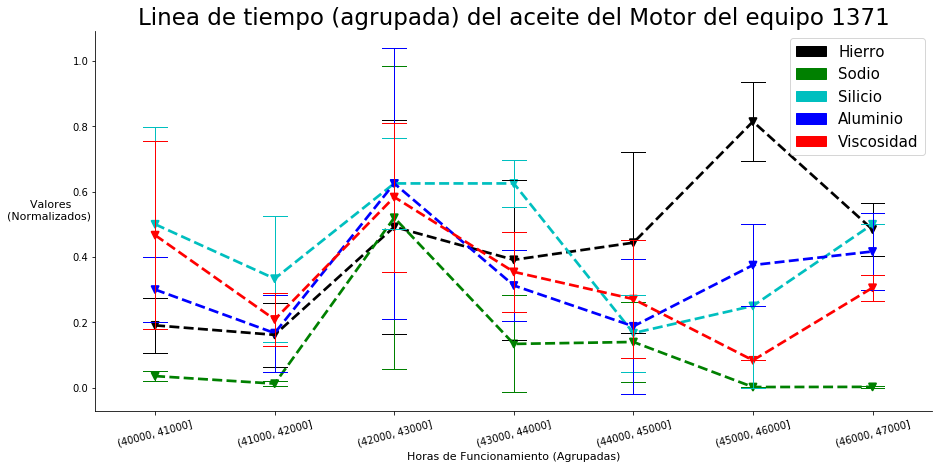

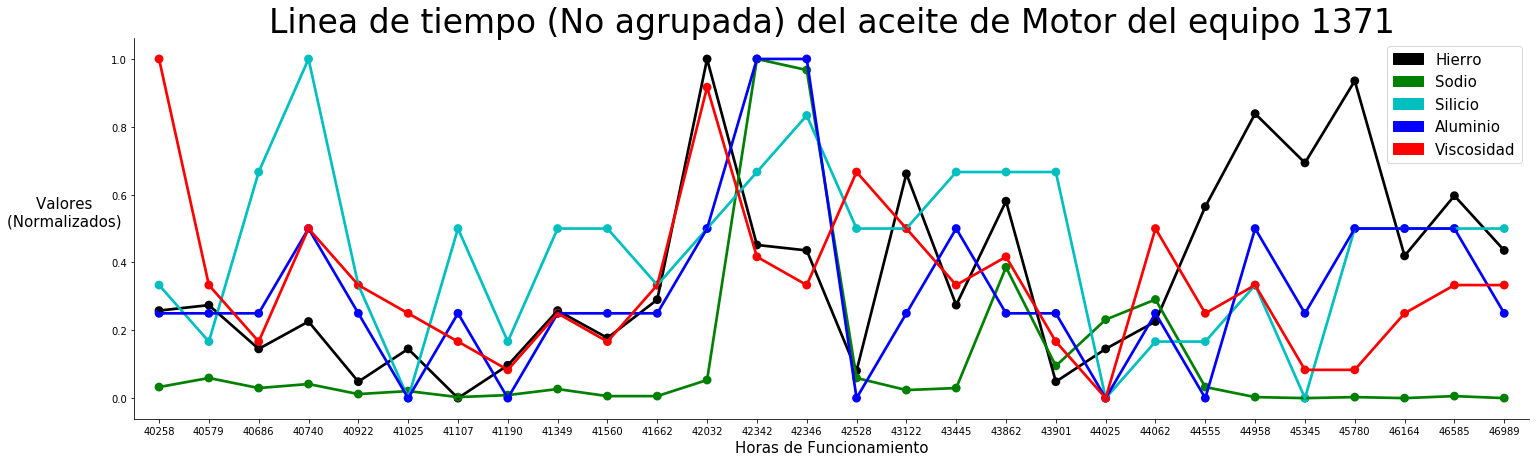

In [18]:
#Realizamos la gráfica del Equipo con los valores normalizados
plt.figure(figsize=(15,7))
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Fe'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Hierro', color='k')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Na'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Sodio', color='g')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Si'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Silicio', color='c')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Al'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Aluminio', color='b')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['VISCO'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Viscosidad', color='r')
plt.xticks(rotation=15)

#Seteamos el label de los componentes
label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

#Ponemos los labels en la imagen, y seteamos el tamaño de las etiquetas
plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
plt.title('Linea de tiempo (agrupada) del aceite del Motor del equipo {}'.format(equipos[1]), size=23)
plt.xlabel('Horas de Funcionamiento (Agrupadas)',size=11)
plt.ylabel('Valores          \n(Normalizados)           ',size=11,rotation=360)
seaborn.despine()
plt.show()

plt.figure(figsize=(25,7))

seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Fe'].dropna(), label='Hierro', color='k')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Na'].dropna(), label='Sodio', color='g')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Si'].dropna(), label='Silicio', color='c')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Al'].dropna(), label='Aluminio', color='b')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['VISCO'].dropna(), label='Viscosidad', color='r')

plt.title('Linea de tiempo (No agrupada) del aceite de Motor del equipo {}'.format(equipos[1]), size=33)
plt.xlabel('Horas de Funcionamiento',size=15)
plt.ylabel('Valores                  \n(Normalizados)                  ',size=15,rotation=360)



label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
seaborn.despine()
plt.show()
   

In [19]:
# Fijamos una semilla para obtener siempre el mismo resultado
random.seed(47)
#Seleccionamos el índice de los 3 Equipos al azar (tenemos que convertir el "diccionario" a "lista" para poder hacerlo).
equipos = random.sample(list(dataset[dataset['Componente']=='Motor']['Equipo'].values), 3)#Recordamos que random.sample es sin reemplazamiento.
equipos

[1402, 1371, 1932]

In [20]:
#Seteamos los datos del equipo (3) a utilizar
data_mot = dataset[(dataset['Componente']=='Motor') & (dataset['Equipo']==1932)]

In [21]:
#Utilizamos una función de agrupación de las "Horas Funcionamiento" para una mejor visualización
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))


#seaborn.countplot(to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,5050,14050), color='c')
#plt.xticks(rotation=45)

intervalo_horas = to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,5050,14050)

In [22]:
#Normalizamos los datos para poder mostrar los 4 features en un mismo gráfico
data_motor = data_mot.copy()
#Creamos una función z-minmax para normalizar los features entre [0,1]
def z(data, maxi, mini):#datos,maximo del feature, minimo del feature
    return (data-mini)/(maxi-mini)


#Obtenemos los datos necesarios de cada feature para realizar la normalización.
for elemento in elementos:
    maxi = data_motor[elemento].dropna().max() #Seleccionamos el máximo del feature
    mini = data_motor[elemento].dropna().min() #Seleccionamos el mínimo del feature
    
    data_motor[elemento] = z(data_motor[elemento],maxi,mini) #Asignamos al dataset los valores normalizados

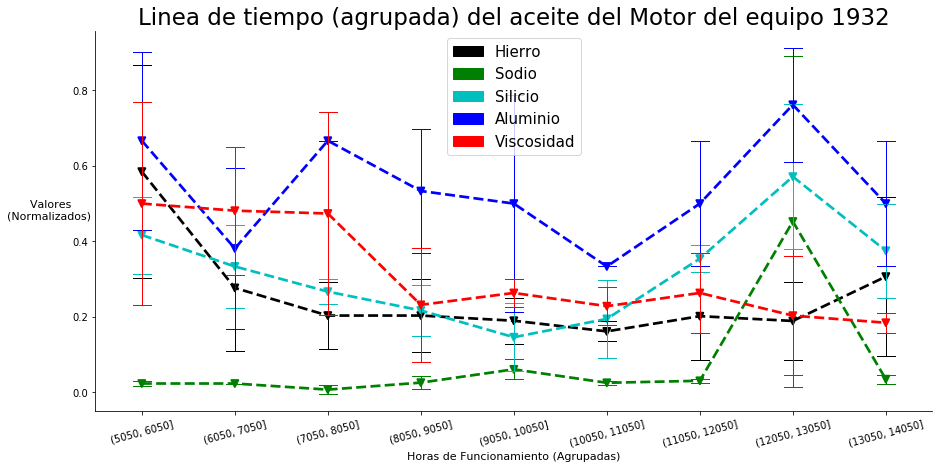

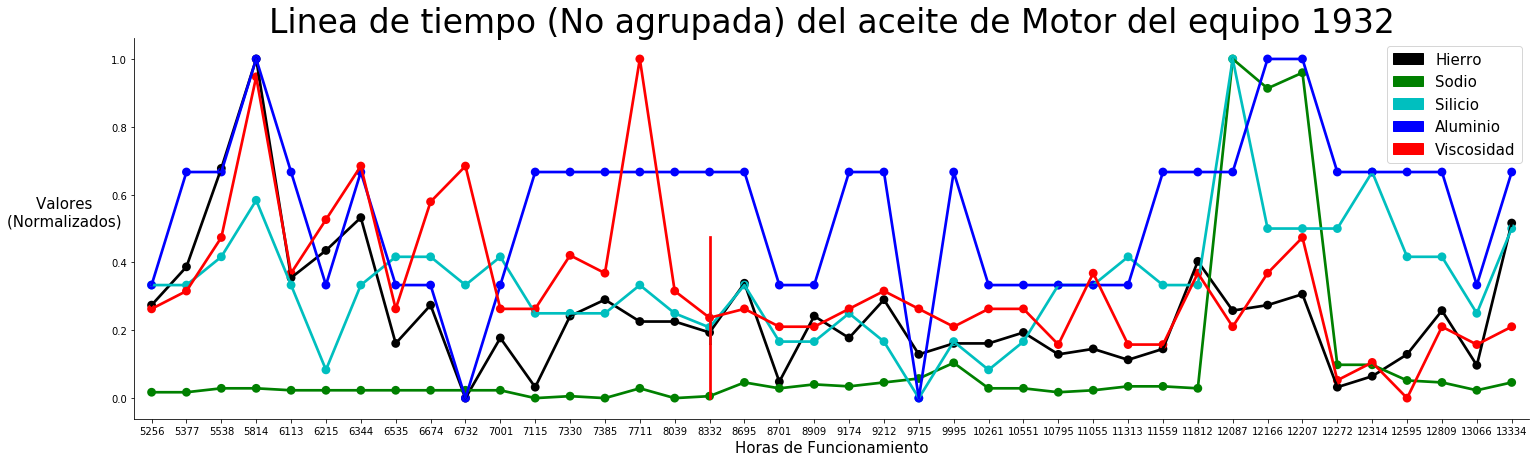

In [23]:
#Realizamos la gráfica del Equipo con los valores normalizados
plt.figure(figsize=(15,7))
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Fe'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Hierro', color='k')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Na'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Sodio', color='g')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Si'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Silicio', color='c')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Al'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Aluminio', color='b')
plt.xticks(rotation=15)
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['VISCO'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Viscosidad', color='r')
plt.xticks(rotation=15)
#Seteamos el label de los componentes
label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

#Ponemos los labels en la imagen, y seteamos el tamaño de las etiquetas
plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
plt.title('Linea de tiempo (agrupada) del aceite del Motor del equipo {}'.format(equipos[2]), size=23)
plt.xlabel('Horas de Funcionamiento (Agrupadas)',size=11)
plt.ylabel('Valores          \n(Normalizados)           ',size=11,rotation=360)
seaborn.despine()
plt.show()

plt.figure(figsize=(25,7))

seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Fe'].dropna(), label='Hierro', color='k')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Na'].dropna(), label='Sodio', color='g')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Si'].dropna(), label='Silicio', color='c')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Al'].dropna(), label='Aluminio', color='b')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['VISCO'].dropna(), label='Viscosidad', color='r')

plt.title('Linea de tiempo (No agrupada) del aceite de Motor del equipo {}'.format(equipos[2]), size=33)
plt.xlabel('Horas de Funcionamiento',size=15)
plt.ylabel('Valores                  \n(Normalizados)                  ',size=15,rotation=360)



label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
seaborn.despine()
plt.show()
   

#### 2. Ahora realizaremos el gráfico de un equipo y 3 de sus componentes componentes

In [24]:
# Fijamos una semilla para obtener siempre el mismo resultado
random.seed(47)
#Seleccionamos el índice de los 3 Equipos al azar (tenemos que convertir el "diccionario" a "lista" para poder hacerlo).
componentes = random.sample(list(dataset[dataset['Equipo']==1402]['Componente'].values), 3)#Recordamos que random.sample es sin reemplazamiento.
componentes

['Transmisión', 'Masa Izquierda', 'Masa Derecha']

In [25]:
#Seteamos los datos del componente a utilizar (Transmisión)
data_mot = dataset[(dataset['Componente']==componentes[0]) & (dataset['Equipo']==1402)]

In [26]:
#Utilizamos una función de agrupación de las "Horas Funcionamiento" para una mejor visualización
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))


#seaborn.countplot(to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,35000,43000), color='c')
#plt.xticks(rotation=45)

intervalo_horas = to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,35000,43000)

In [27]:
#Normalizamos los datos para poder mostrar los 4 features en un mismo gráfico
data_motor = data_mot.copy()
#Creamos una función z-minmax para normalizar los features entre [0,1]
def z(data, maxi, mini):#datos,maximo del feature, minimo del feature
    return (data-mini)/(maxi-mini)

#Obtenemos los datos necesarios de cada feature para realizar la normalización.
for elemento in elementos:
    maxi = data_motor[elemento].dropna().max() #Seleccionamos el máximo del feature
    mini = data_motor[elemento].dropna().min() #Seleccionamos el mínimo del feature
    
    data_motor[elemento] = z(data_motor[elemento],maxi,mini) #Asignamos al dataset los valores normalizados

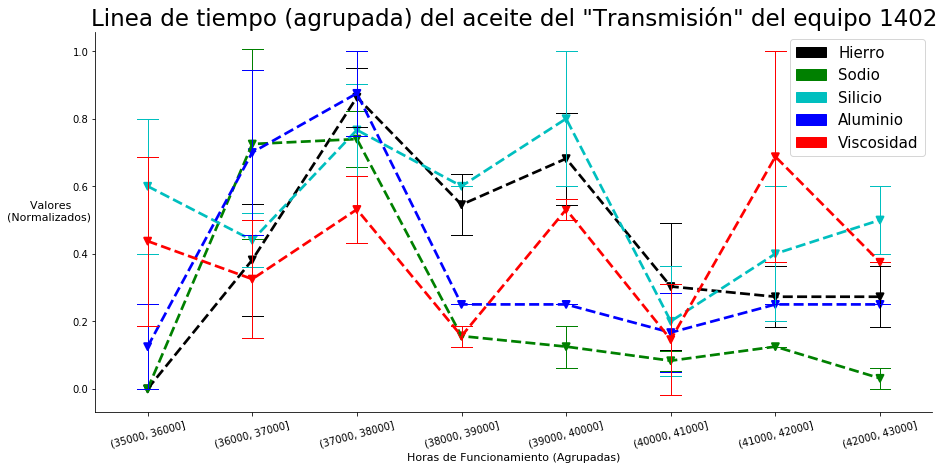

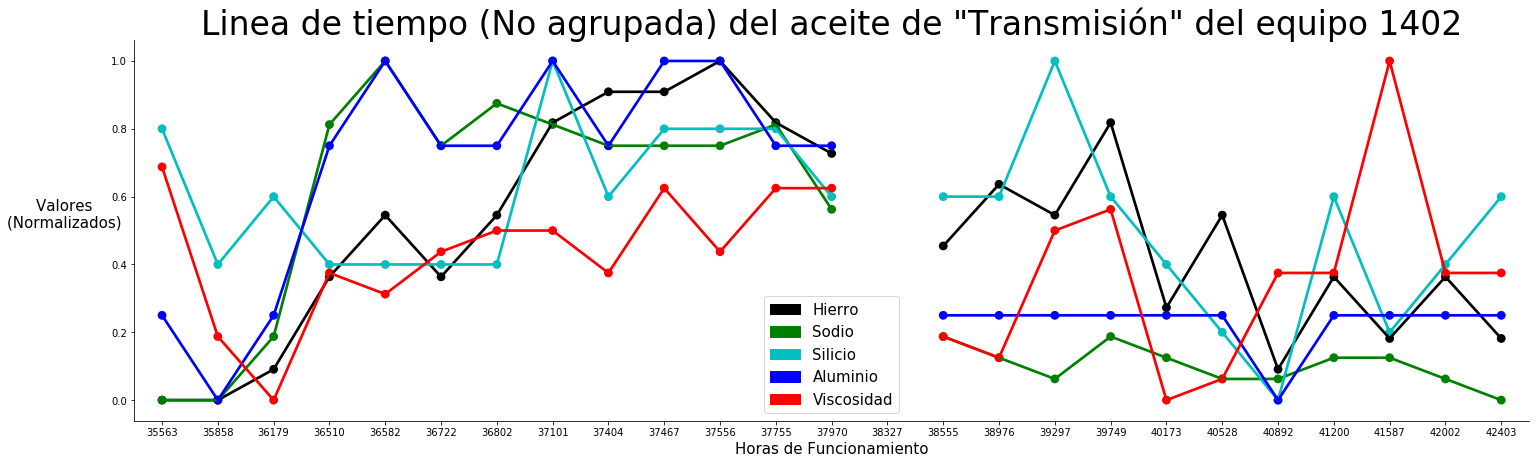

In [28]:
#Realizamos la gráfica del Equipo con los valores normalizados
plt.figure(figsize=(15,7))
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Fe'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Hierro', color='k')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Na'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Sodio', color='g')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Si'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Silicio', color='c')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Al'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Aluminio', color='b')
plt.xticks(rotation=15)
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['VISCO'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Viscosidad', color='r')
plt.xticks(rotation=15)
#Seteamos el label de los componentes
label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

#Ponemos los labels en la imagen, y seteamos el tamaño de las etiquetas
plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
plt.title('Linea de tiempo (agrupada) del aceite del "{}" del equipo 1402'.format(componentes[0]), size=23)
plt.xlabel('Horas de Funcionamiento (Agrupadas)',size=11)
plt.ylabel('Valores          \n(Normalizados)           ',size=11,rotation=360)
seaborn.despine()
plt.show()

plt.figure(figsize=(25,7))

seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Fe'].dropna(), label='Hierro', color='k')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Na'].dropna(), label='Sodio', color='g')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Si'].dropna(), label='Silicio', color='c')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Al'].dropna(), label='Aluminio', color='b')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['VISCO'].dropna(), label='Viscosidad', color='r')

plt.title('Linea de tiempo (No agrupada) del aceite de "{}" del equipo 1402'.format(componentes[0]), size=33)
plt.xlabel('Horas de Funcionamiento',size=15)
plt.ylabel('Valores                  \n(Normalizados)                  ',size=15,rotation=360)



label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')


plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
seaborn.despine()
plt.show()
   

In [29]:
# Fijamos una semilla para obtener siempre el mismo resultado
random.seed(47)
#Seleccionamos el índice de los 3 Equipos al azar (tenemos que convertir el "diccionario" a "lista" para poder hacerlo).
componentes = random.sample(list(dataset[dataset['Equipo']==1402]['Componente'].values), 3)#Recordamos que random.sample es sin reemplazamiento.
componentes

['Transmisión', 'Masa Izquierda', 'Masa Derecha']

In [30]:
#Seteamos los datos del componente a utilizar (Masa Izquierda)
data_mot = dataset[(dataset['Componente']==componentes[1]) & (dataset['Equipo']==1402)]

In [31]:
#Utilizamos una función de agrupación de las "Horas Funcionamiento" para una mejor visualización
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))


#seaborn.countplot(to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,35000,43000), color='c')
#plt.xticks(rotation=45)

intervalo_horas = to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,35000,43000)

In [32]:
#Normalizamos los datos para poder mostrar los 4 features en un mismo gráfico
data_motor = data_mot.copy()
#Creamos una función z-minmax para normalizar los features entre [0,1]
def z(data, maxi, mini):#datos,maximo del feature, minimo del feature
    return (data-mini)/(maxi-mini)

#Obtenemos los datos necesarios de cada feature para realizar la normalización.
for elemento in elementos:
    maxi = data_motor[elemento].dropna().max() #Seleccionamos el máximo del feature
    mini = data_motor[elemento].dropna().min() #Seleccionamos el mínimo del feature
    
    data_motor[elemento] = z(data_motor[elemento],maxi,mini) #Asignamos al dataset los valores normalizados

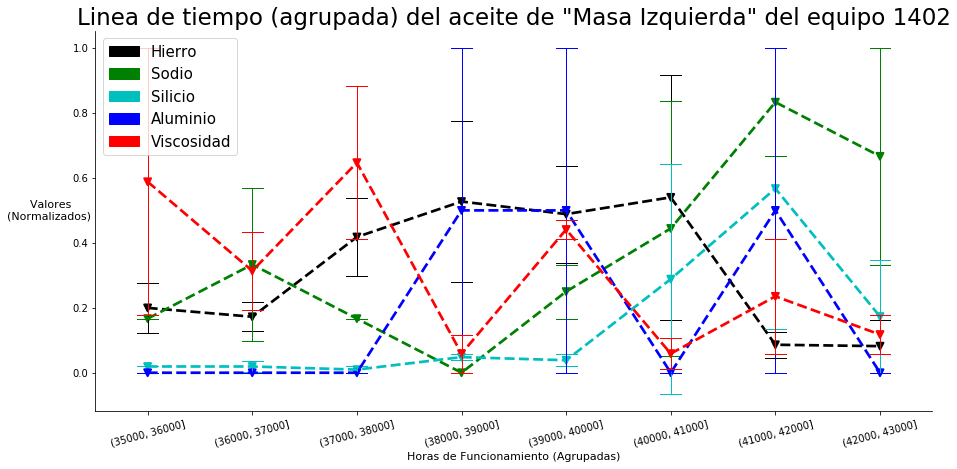

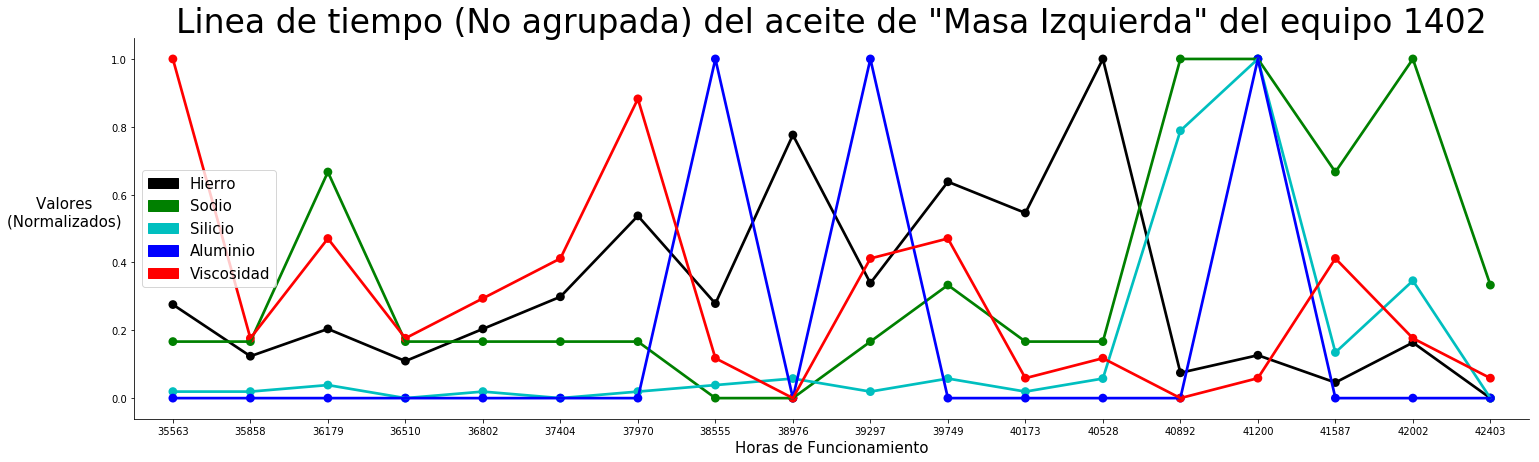

In [33]:
#Realizamos la gráfica del Equipo con los valores normalizados
plt.figure(figsize=(15,7))
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Fe'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Hierro', color='k')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Na'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Sodio', color='g')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Si'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Silicio', color='c')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Al'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Aluminio', color='b')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['VISCO'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Aluminio', color='r')

plt.xticks(rotation=15)
#Seteamos el label de los componentes
label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

#Ponemos los labels en la imagen, y seteamos el tamaño de las etiquetas
plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
plt.title('Linea de tiempo (agrupada) del aceite de "{}" del equipo 1402'.format(componentes[1]), size=23)
plt.xlabel('Horas de Funcionamiento (Agrupadas)',size=11)
plt.ylabel('Valores          \n(Normalizados)           ',size=11,rotation=360)
seaborn.despine()
plt.show()

plt.figure(figsize=(25,7))

seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Fe'].dropna(), label='Hierro', color='k')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Na'].dropna(), label='Sodio', color='g')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Si'].dropna(), label='Silicio', color='c')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Al'].dropna(), label='Aluminio', color='b')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['VISCO'].dropna(), label='Viscosidad', color='r')


plt.title('Linea de tiempo (No agrupada) del aceite de "{}" del equipo 1402'.format(componentes[1]), size=33)
plt.xlabel('Horas de Funcionamiento',size=15)
plt.ylabel('Valores                  \n(Normalizados)                  ',size=15,rotation=360)



label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
seaborn.despine()
plt.show()
   

In [34]:
# Fijamos una semilla para obtener siempre el mismo resultado
random.seed(47)
#Seleccionamos el índice de los 3 Equipos al azar (tenemos que convertir el "diccionario" a "lista" para poder hacerlo).
componentes = random.sample(list(dataset[dataset['Equipo']==1402]['Componente'].values), 3)#Recordamos que random.sample es sin reemplazamiento.
componentes

['Transmisión', 'Masa Izquierda', 'Masa Derecha']

In [35]:
#Seteamos los datos del componente a utilizar (Masa Derecha)
data_mot = dataset[(dataset['Componente']==componentes[2]) & (dataset['Equipo']==1402)]

In [36]:
#Utilizamos una función de agrupación de las "Horas Funcionamiento" para una mejor visualización
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))


#seaborn.countplot(to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,35000,43000), color='c')
#plt.xticks(rotation=45)

intervalo_horas = to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,35000,43000)

In [37]:
#Normalizamos los datos para poder mostrar los 5 features en un mismo gráfico
data_motor = data_mot.copy()
#Creamos una función z-minmax para normalizar los features entre [0,1]
def z(data, maxi, mini):#datos,maximo del feature, minimo del feature
    return (data-mini)/(maxi-mini)


#Obtenemos los datos necesarios de cada feature para realizar la normalización.
for elemento in elementos:
    maxi = data_motor[elemento].dropna().max() #Seleccionamos el máximo del feature
    mini = data_motor[elemento].dropna().min() #Seleccionamos el mínimo del feature
    
    data_motor[elemento] = z(data_motor[elemento],maxi,mini) #Asignamos al dataset los valores normalizados

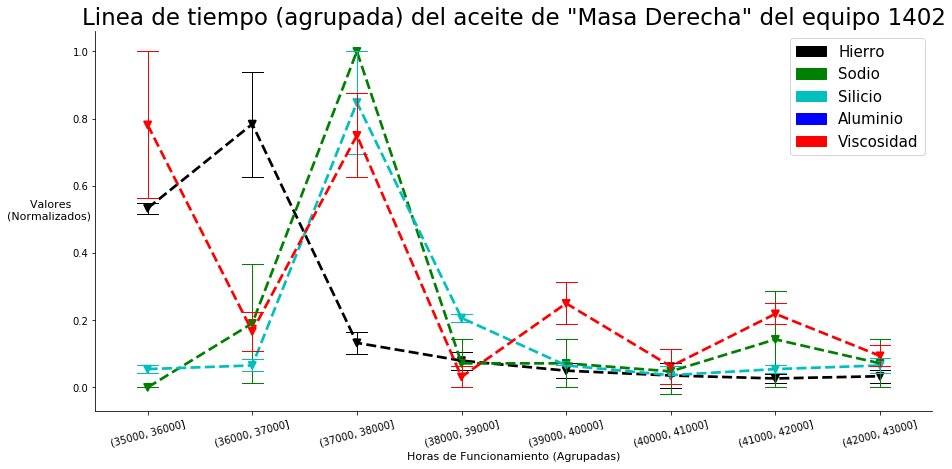

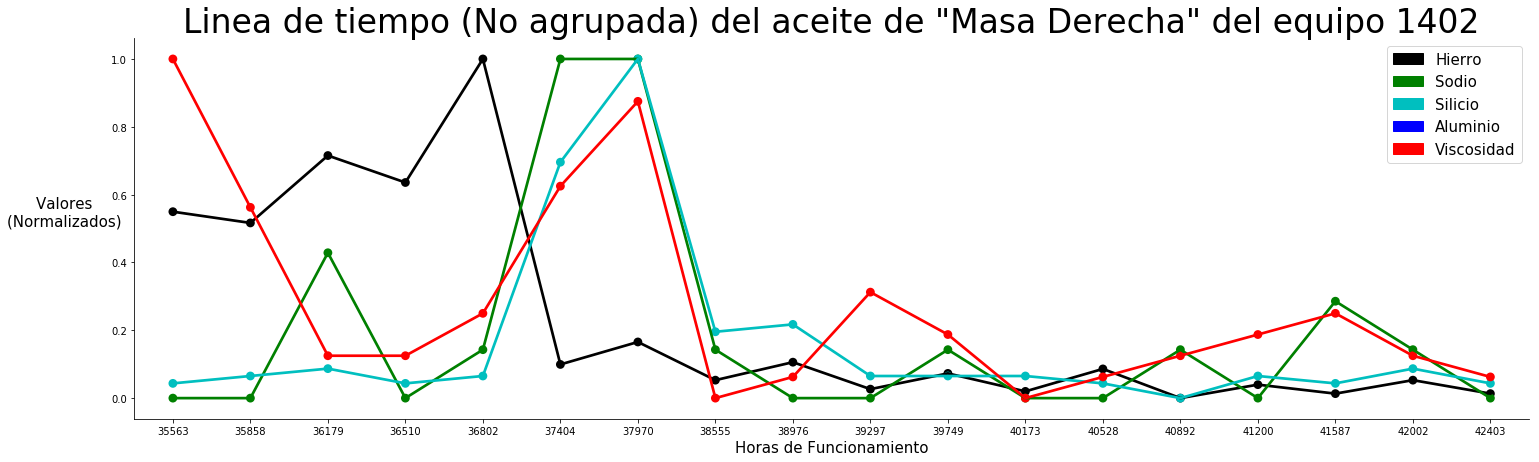

In [38]:
#Realizamos la gráfica del Equipo con los valores normalizados
plt.figure(figsize=(15,7))
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Fe'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Hierro', color='k')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Na'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Sodio', color='g')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Si'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Silicio', color='c')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Al'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Aluminio', color='b')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['VISCO'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Aluminio', color='r')

plt.xticks(rotation=15)
#Seteamos el label de los componentes
label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')


#Ponemos los labels en la imagen, y seteamos el tamaño de las etiquetas
plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
plt.title('Linea de tiempo (agrupada) del aceite de "{}" del equipo 1402'.format(componentes[2]), size=23)
plt.xlabel('Horas de Funcionamiento (Agrupadas)',size=11)
plt.ylabel('Valores          \n(Normalizados)           ',size=11,rotation=360)
seaborn.despine()
plt.show()

plt.figure(figsize=(25,7))

seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Fe'].dropna(), label='Hierro', color='k')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Na'].dropna(), label='Sodio', color='g')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Si'].dropna(), label='Silicio', color='c')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Al'].dropna(), label='Aluminio', color='b')
seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['VISCO'].dropna(), label='Viscosidad', color='r')

plt.title('Linea de tiempo (No agrupada) del aceite de "{}" del equipo 1402'.format(componentes[2]), size=33)
plt.xlabel('Horas de Funcionamiento',size=15)
plt.ylabel('Valores                  \n(Normalizados)                  ',size=15,rotation=360)



label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

plt.legend(handles=[label_Fe,label_Na,label_Si,label_Al,label_VI],prop={'size': 15})
seaborn.despine()
plt.show()
   

## 3. Correlaciones

#### 1.  A continuación analizaremos la Viscosidad vs el Hierro (Fe), a medida que aumentan las Horas del Aceite

###### 1er Ejemplo: Motor del equipo 1371

In [39]:
# Fijamos una semilla para obtener siempre el mismo resultado
random.seed(47)
#Seleccionamos el índice de los 3 Equipos al azar (tenemos que convertir el "diccionario" a "lista" para poder hacerlo).
equipos = random.sample(list(dataset[dataset['Componente']=='Motor']['Equipo'].values), 3)#Recordamos que random.sample es sin reemplazamiento.
equipos

[1402, 1371, 1932]

In [40]:
#Seteamos los datos del equipo (2) a utilizar
data_mot = dataset[(dataset['Componente']=='Motor') & (dataset['Equipo']==1371)]


In [41]:
#Utilizamos una función de agrupación de las "Horas Funcionamiento" para una mejor visualización
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))


#seaborn.countplot(to_categorical(data_mot['Horas del Aceite'].dropna(),50,35,750), color='c')
#plt.xticks(rotation=45)

intervalo_horas = to_categorical(data_mot['Horas del Aceite'].dropna(),50,35,750)

In [42]:
#Normalizamos los datos para poder mostrar los 4 features en un mismo gráfico
data_motor = data_mot.copy()
#Creamos una función z-minmax para normalizar los features entre [0,1]
def z(data, maxi, mini):#datos,maximo del feature, minimo del feature
    return (data-mini)/(maxi-mini)

#Obtenemos los datos necesarios de cada feature para realizar la normalización.
for elemento in elementos:
    maxi = data_motor[elemento].dropna().max() #Seleccionamos el máximo del feature
    mini = data_motor[elemento].dropna().min() #Seleccionamos el mínimo del feature
    
    data_motor[elemento] = z(data_motor[elemento],maxi,mini) #Asignamos al dataset los valores normalizados

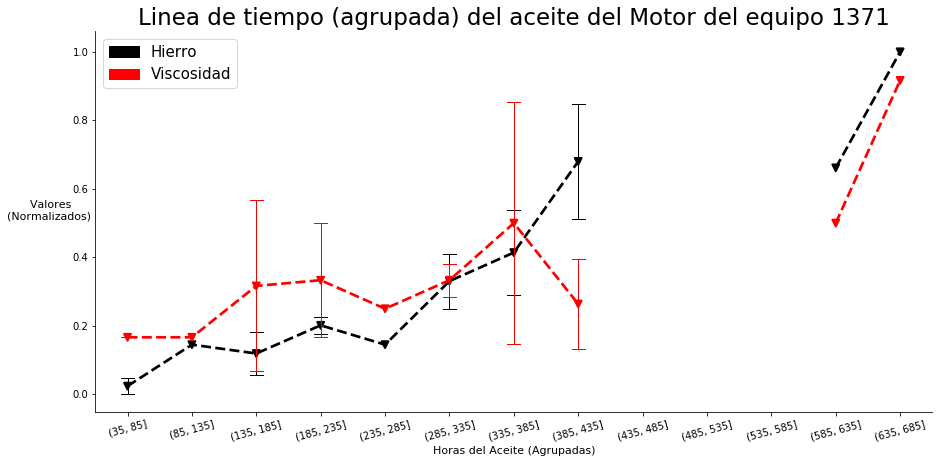

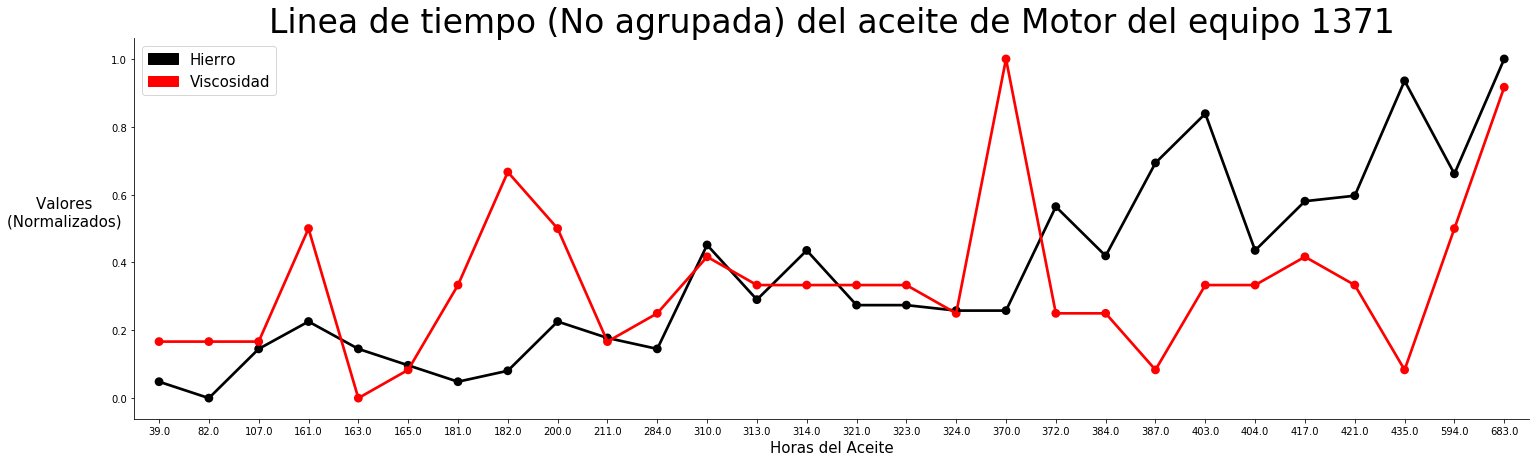

In [43]:
#Realizamos la gráfica del Equipo con los valores normalizados
plt.figure(figsize=(15,7))
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Fe'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Hierro', color='k')
#seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Na'],
#                  dodge=True, ci='sd',
#                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Sodio', color='g')
#seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Si'],
#                  dodge=True, ci='sd',
#                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Silicio', color='c')
#seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Al'],
#                  dodge=True, ci='sd',
#                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Aluminio', color='b')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['VISCO'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Viscosidad', color='r')
plt.xticks(rotation=15)

#Seteamos el label de los componentes
label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

#Ponemos los labels en la imagen, y seteamos el tamaño de las etiquetas
plt.legend(handles=[label_Fe,label_VI],prop={'size': 15})
plt.title('Linea de tiempo (agrupada) del aceite del Motor del equipo {}'.format(equipos[1]), size=23)
plt.xlabel('Horas del Aceite (Agrupadas)',size=11)
plt.ylabel('Valores          \n(Normalizados)           ',size=11,rotation=360)
seaborn.despine()
plt.show()

plt.figure(figsize=(25,7))

seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Fe'].dropna(), label='Hierro', color='k')
#seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Na'].dropna(), label='Sodio', color='g')
#seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Si'].dropna(), label='Silicio', color='c')
#seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Al'].dropna(), label='Aluminio', color='b')
seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['VISCO'].dropna(), label='Viscosidad', color='r')

plt.title('Linea de tiempo (No agrupada) del aceite de Motor del equipo {}'.format(equipos[1]), size=33)
plt.xlabel('Horas del Aceite',size=15)
plt.ylabel('Valores                  \n(Normalizados)                  ',size=15,rotation=360)



label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

plt.legend(handles=[label_Fe,label_VI],prop={'size': 15})
seaborn.despine()
plt.show()
   

En el gráfico anterior visualmente no parece haber una correlación directa entre el Hierro y la viscosidad a medida que aumentan las horas del aceite

Analizamos la posibilidad de correlación analiticamente mediante el **Coeficiente de Spearman**

In [44]:
data_motor[['Fe','VISCO']].corr(method='spearman')

,Fe,VISCO
Fe,1.000000,0.232281
VISCO,0.232281,1.000000


Observamos que el coeficiente es muy bajo, por lo que podríamos descartar la correlación entre los features

###### 2do Ejemplo: Motor del equipo 1402

In [45]:
# Fijamos una semilla para obtener siempre el mismo resultado
random.seed(47)
#Seleccionamos el índice de los 3 Equipos al azar (tenemos que convertir el "diccionario" a "lista" para poder hacerlo).
equipos = random.sample(list(dataset[dataset['Componente']=='Motor']['Equipo'].values), 3)#Recordamos que random.sample es sin reemplazamiento.
equipos

[1402, 1371, 1932]

In [46]:
#Seteamos los datos del equipo (3) a utilizar
data_mot = dataset[(dataset['Componente']=='Motor') & (dataset['Equipo']==1402)]


In [47]:
#Utilizamos una función de agrupación de las "Horas Funcionamiento" para una mejor visualización
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))


#seaborn.countplot(to_categorical(data_mot['Horas del Aceite'].dropna(),70,190,700), color='c')
#plt.xticks(rotation=45)

intervalo_horas = to_categorical(data_mot['Horas del Aceite'].dropna(),70,190,700)

In [48]:
#Normalizamos los datos para poder mostrar los 4 features en un mismo gráfico
data_motor = data_mot.copy()
#Creamos una función z-minmax para normalizar los features entre [0,1]
def z(data, maxi, mini):#datos,maximo del feature, minimo del feature
    return (data-mini)/(maxi-mini)

#Obtenemos los datos necesarios de cada feature para realizar la normalización.
for elemento in elementos:
    maxi = data_motor[elemento].dropna().max() #Seleccionamos el máximo del feature
    mini = data_motor[elemento].dropna().min() #Seleccionamos el mínimo del feature
    
    data_motor[elemento] = z(data_motor[elemento],maxi,mini) #Asignamos al dataset los valores normalizados

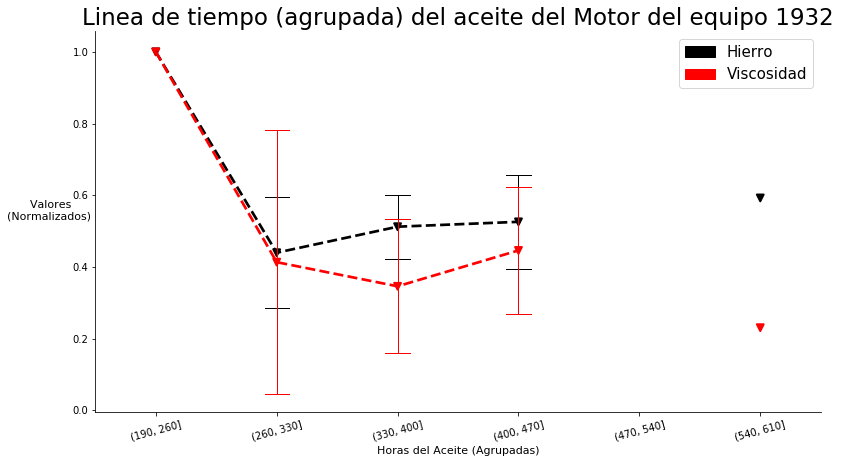

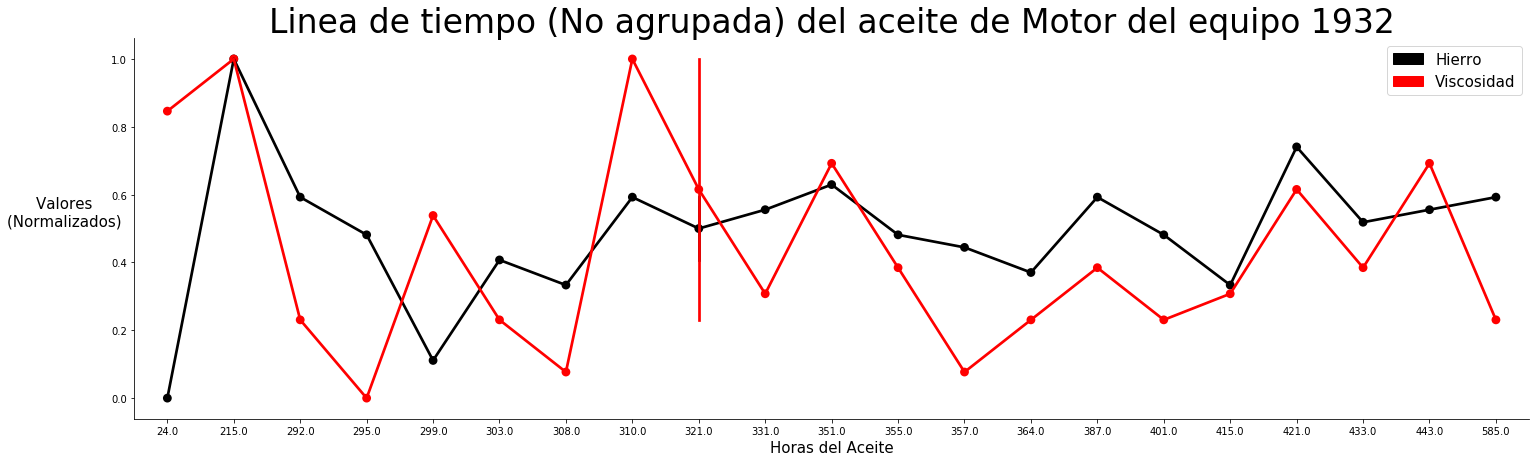

In [49]:
#Realizamos la gráfica del Equipo con los valores normalizados
plt.figure(figsize=(13,7))
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Fe'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Hierro', color='k')
#seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Na'],
#                  dodge=True, ci='sd',
#                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Sodio', color='g')
#seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Si'],
#                  dodge=True, ci='sd',
#                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Silicio', color='c')
#seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['Al'],
#                  dodge=True, ci='sd',
#                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Aluminio', color='b')
seaborn.pointplot(data=data_motor, x=intervalo_horas, y=data_motor['VISCO'],
                  dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, label='Viscosidad', color='r')
plt.xticks(rotation=15)

#Seteamos el label de los componentes
label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

#Ponemos los labels en la imagen, y seteamos el tamaño de las etiquetas
plt.legend(handles=[label_Fe,label_VI],prop={'size': 15})
plt.title('Linea de tiempo (agrupada) del aceite del Motor del equipo {}'.format(equipos[2]), size=23)
plt.xlabel('Horas del Aceite (Agrupadas)',size=11)
plt.ylabel('Valores          \n(Normalizados)           ',size=11,rotation=360)
seaborn.despine()
plt.show()

plt.figure(figsize=(25,7))

seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Fe'].dropna(), label='Hierro', color='k')
#seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Na'].dropna(), label='Sodio', color='g')
#seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Si'].dropna(), label='Silicio', color='c')
#seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Al'].dropna(), label='Aluminio', color='b')
seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['VISCO'].dropna(), label='Viscosidad', color='r')

plt.title('Linea de tiempo (No agrupada) del aceite de Motor del equipo {}'.format(equipos[2]), size=33)
plt.xlabel('Horas del Aceite',size=15)
plt.ylabel('Valores                  \n(Normalizados)                  ',size=15,rotation=360)



label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')

plt.legend(handles=[label_Fe,label_VI],prop={'size': 15})
seaborn.despine()
plt.show()
   

En el gráfico anterior no se observa claramente que haya una correlación directa, aunque hay tendencias en comun

Analizamos la posibilidad de correlación analiticamente mediante el **Coeficiente de Spearman**

In [50]:
data_motor[['Fe','VISCO']].corr(method='spearman')

,Fe,VISCO
Fe,1.000000,0.245319
VISCO,0.245319,1.000000


Observamos que el coeficiente es muy bajo, por lo que podríamos descartar la correlación entre los features

#### 2.  A continuación analizaremos el Sodio (Na) respecto a los Resultados de las muestras

In [63]:
# Fijamos una semilla para obtener siempre el mismo resultado
random.seed(47)
#Seleccionamos el índice de los 3 Equipos al azar (tenemos que convertir el "diccionario" a "lista" para poder hacerlo).
componentes = random.sample(list(dataset[dataset['Equipo']==1402]['Componente'].values), 3)#Recordamos que random.sample es sin reemplazamiento.
componentes

['Transmisión', 'Masa Izquierda', 'Masa Derecha']

In [64]:
#Seteamos los datos del componente a utilizar (Masa Derecha)
data_mot = dataset[(dataset['Componente']==componentes[2]) & (dataset['Equipo']==1402)]

In [65]:
#Utilizamos una función de agrupación de las "Horas Funcionamiento" para una mejor visualización
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))


#seaborn.countplot(to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,35000,43000), color='c')
#plt.xticks(rotation=45)

intervalo_horas = to_categorical(data_mot['Horas del Aceite'].dropna(),1000,35000,43000)

In [66]:
#Normalizamos los datos para poder mostrar los 5 features en un mismo gráfico
data_motor = data_mot.copy()
#Creamos una función z-minmax para normalizar los features entre [0,1]
def z(data, maxi, mini):#datos,maximo del feature, minimo del feature
    return (data-mini)/(maxi-mini)

#Obtenemos los datos necesarios de cada feature para realizar la normalización.
for elemento in elementos:
    maxi = data_motor[elemento].dropna().max() #Seleccionamos el máximo del feature
    mini = data_motor[elemento].dropna().min() #Seleccionamos el mínimo del feature
    
    data_motor[elemento] = z(data_motor[elemento],maxi,mini) #Asignamos al dataset los valores normalizados

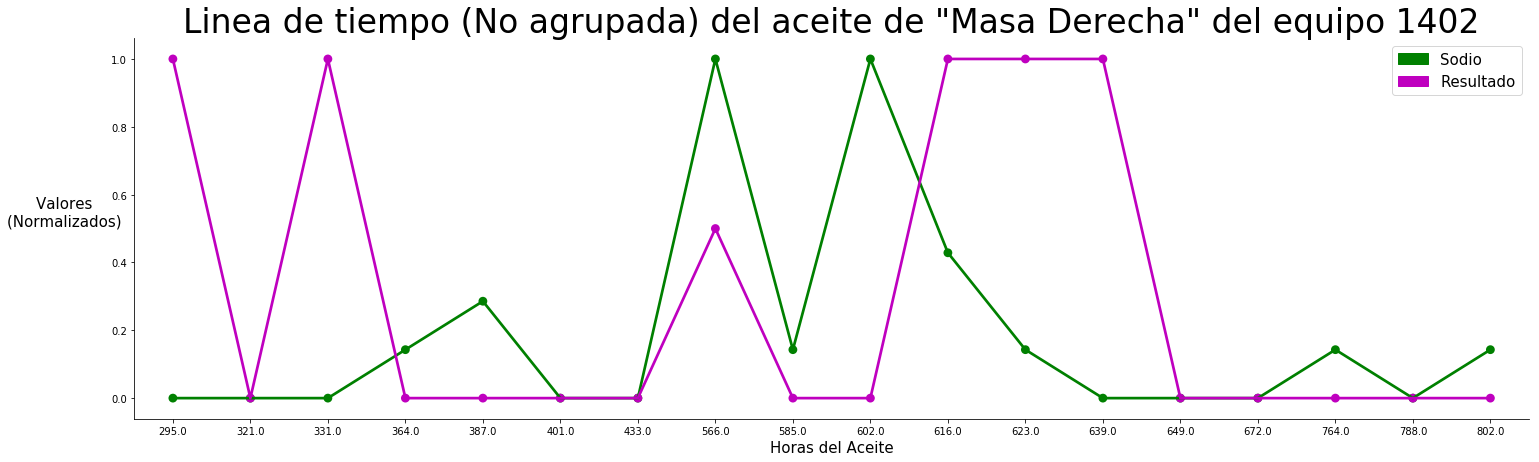

In [67]:
#Realizamos la gráfica del Equipo con los valores normalizados

plt.figure(figsize=(25,7))

#seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Fe'].dropna(), label='Hierro', color='k')
seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Na'].dropna(), label='Sodio', color='g')
#seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Si'].dropna(), label='Silicio', color='c')
#seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Al'].dropna(), label='Aluminio', color='b')
#seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['VISCO'].dropna(), label='Viscosidad', color='r')
seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Resultado'].dropna(), label='Resultado', color='m')


plt.title('Linea de tiempo (No agrupada) del aceite de "{}" del equipo 1402'.format(componentes[2]), size=33)
plt.xlabel('Horas del Aceite',size=15)
plt.ylabel('Valores                  \n(Normalizados)                  ',size=15,rotation=360)



#label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
#label_Si = mpatches.Patch(color='c', label='Silicio')
#label_Al = mpatches.Patch(color='b', label='Aluminio')
#label_VI = mpatches.Patch(color='r', label='Viscosidad')
label_Re = mpatches.Patch(color='m', label='Resultado')

plt.legend(handles=[label_Na,label_Re],prop={'size': 15})
seaborn.despine()
plt.show()


Como vemos en el gráfico anterior, no se aprecia una correllación visible entre el resultado y el aumento del valor del Sodio

Analizamos la posibilidad de correlación analiticamente mediante el **Coeficiente de Spearman**

In [70]:
data_motor[['Na','Resultado']].corr(method='spearman')

,Na,Resultado
Na,1.000000,0.024969
Resultado,0.024969,1.000000


Observamos que practicamente **no existe una correlación** entre los valores del Sodio y los Resultados de las muestras del laboratorio.

In [57]:
# Fijamos una semilla para obtener siempre el mismo resultado
random.seed(47)
#Seleccionamos el índice de los 3 Equipos al azar (tenemos que convertir el "diccionario" a "lista" para poder hacerlo).
equipos = random.sample(list(dataset[dataset['Componente']=='Motor']['Equipo'].values), 3)#Recordamos que random.sample es sin reemplazamiento.
equipos

[1402, 1371, 1932]

In [58]:
#Seteamos los datos del equipo (1) a utilizar
data_mot = dataset[(dataset['Componente']=='Motor') & (dataset['Equipo']==1371)]


In [59]:
#Utilizamos una función de agrupación de las "Horas Funcionamiento" para una mejor visualización
def to_categorical(column, bin_size=5, min_cut=15, max_cut=50):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x+bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))


#seaborn.countplot(to_categorical(data_mot['Horas Funcionamiento'].dropna(),1000,35000,43000), color='c')
#plt.xticks(rotation=45)

intervalo_horas = to_categorical(data_mot['Horas del Aceite'].dropna(),1000,35000,43000)

In [60]:
#Normalizamos los datos para poder mostrar los features en un mismo gráfico
data_motor = data_mot.copy()
#Creamos una función z-minmax para normalizar los features entre [0,1]
def z(data, maxi, mini):#datos,maximo del feature, minimo del feature
    return (data-mini)/(maxi-mini)


#Obtenemos los datos necesarios de cada feature para realizar la normalización.
for elemento in elementos:
    maxi = data_motor[elemento].dropna().max() #Seleccionamos el máximo del feature
    mini = data_motor[elemento].dropna().min() #Seleccionamos el mínimo del feature
    
    data_motor[elemento] = z(data_motor[elemento],maxi,mini) #Asignamos al dataset los valores normalizados

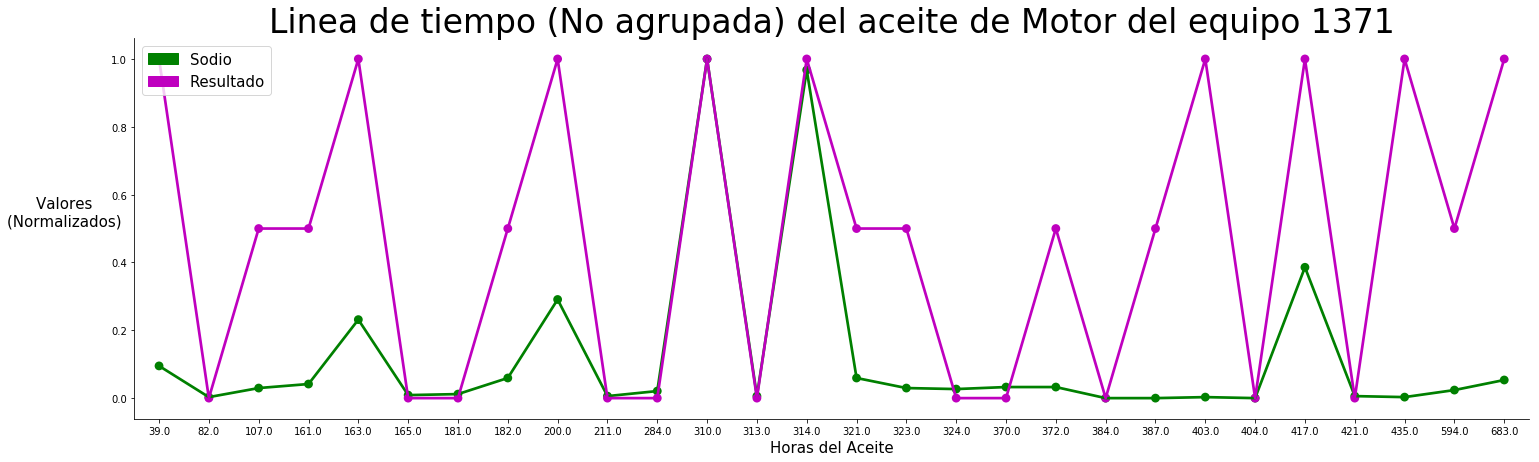

In [61]:
#Realizamos la gráfica del Equipo con los valores normalizados

plt.figure(figsize=(25,7))

#seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Fe'].dropna(), label='Hierro', color='k')
seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Na'].dropna(), label='Sodio', color='g')
#seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Si'].dropna(), label='Silicio', color='c')
#seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['Al'].dropna(), label='Aluminio', color='b')
#seaborn.pointplot(x=data_motor['Horas Funcionamiento'].dropna(), y=data_motor['VISCO'].dropna(), label='Viscosidad', color='r')
seaborn.pointplot(x=data_motor['Horas del Aceite'].dropna(), y=data_motor['Resultado'].dropna(), label='Resultado', color='m')


plt.title('Linea de tiempo (No agrupada) del aceite de Motor del equipo {}'.format(equipos[1]), size=33)
plt.xlabel('Horas del Aceite',size=15)
plt.ylabel('Valores                  \n(Normalizados)                  ',size=15,rotation=360)



label_Fe = mpatches.Patch(color='k', label='Hierro')
label_Na = mpatches.Patch(color='g', label='Sodio')
label_Si = mpatches.Patch(color='c', label='Silicio')
label_Al = mpatches.Patch(color='b', label='Aluminio')
label_VI = mpatches.Patch(color='r', label='Viscosidad')
label_Re = mpatches.Patch(color='m', label='Resultado')


plt.legend(handles=[label_Na,label_Re],prop={'size': 15})
seaborn.despine()
plt.show()
   

Aquí(arriba) si parecería haber una correlación visual entre el Resultado y el Valor de Sodio, pero no es tan evidente.
**Se aprecia que cuando los valores de Sodio se elevan, la muestra tiende a ser mala o regular.**

Analizamos la posibilidad de correlación analiticamente mediante el **Coeficiente de Spearman**

In [62]:
data_motor[['Na','Resultado']].corr(method='spearman')

,Na,Resultado
Na,1.000000,0.603925
Resultado,0.603925,1.000000


Observamos que existe una **correlación del 60%** entre los valores del Sodio y los Resultados de las muestras del laboratorio.